In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe().columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#Среднее среди выживших
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# Распределение выживших в зависимости от пола

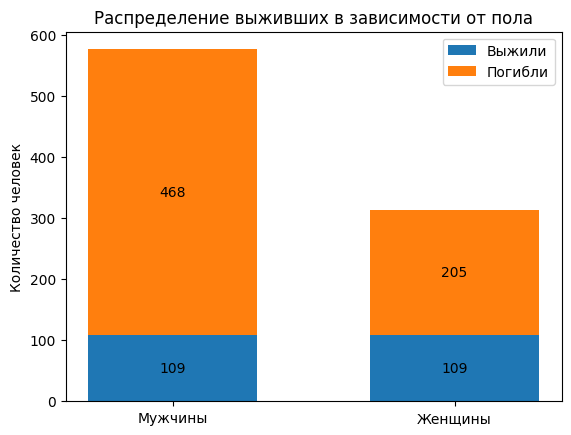

In [9]:
male = 'male'
female = 'female'

males_total = len(df.loc[(df['Sex'] == male)])
females_total = len(df.loc[(df['Sex'] == female)])
males_survived = len(df.loc[((df['Sex'] == male) & (df['Survived'] == 1))])
females_survived = len(df.loc[((df['Sex'] == male) & (df['Survived'] == 1))])

survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Мужчины имели меньшие шансы на выживаемость

# График распределения выживаемости по классам пассажиров

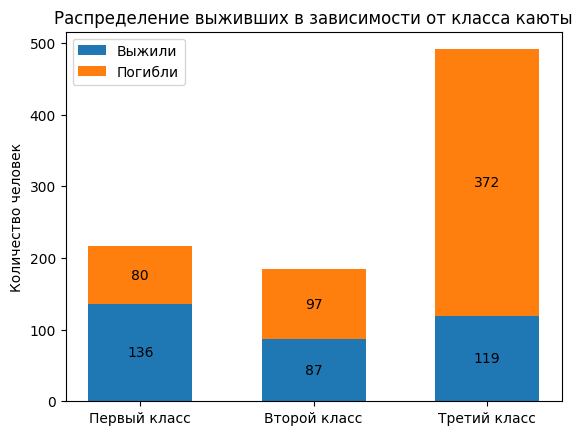

In [10]:
first_total = len(df.loc[(df['Pclass'] == 1)])
second_total = len(df.loc[(df['Pclass'] == 2)])
third_total = len(df.loc[(df['Pclass'] == 3)])
first_survived = len(df.loc[((df['Pclass'] == 1) & (df['Survived'] == 1))])
second_survived = len(df.loc[((df['Pclass'] == 2) & (df['Survived'] == 1))])
third_survived = len(df.loc[((df['Pclass'] == 3) & (df['Survived'] == 1))])

survivors_counts = {
    'Выжили': [first_survived, second_survived, third_survived],
    'Погибли': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса каюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Каюты третьего класса имели меньшие шансы выжить

# Влияние возраста на выживаемость

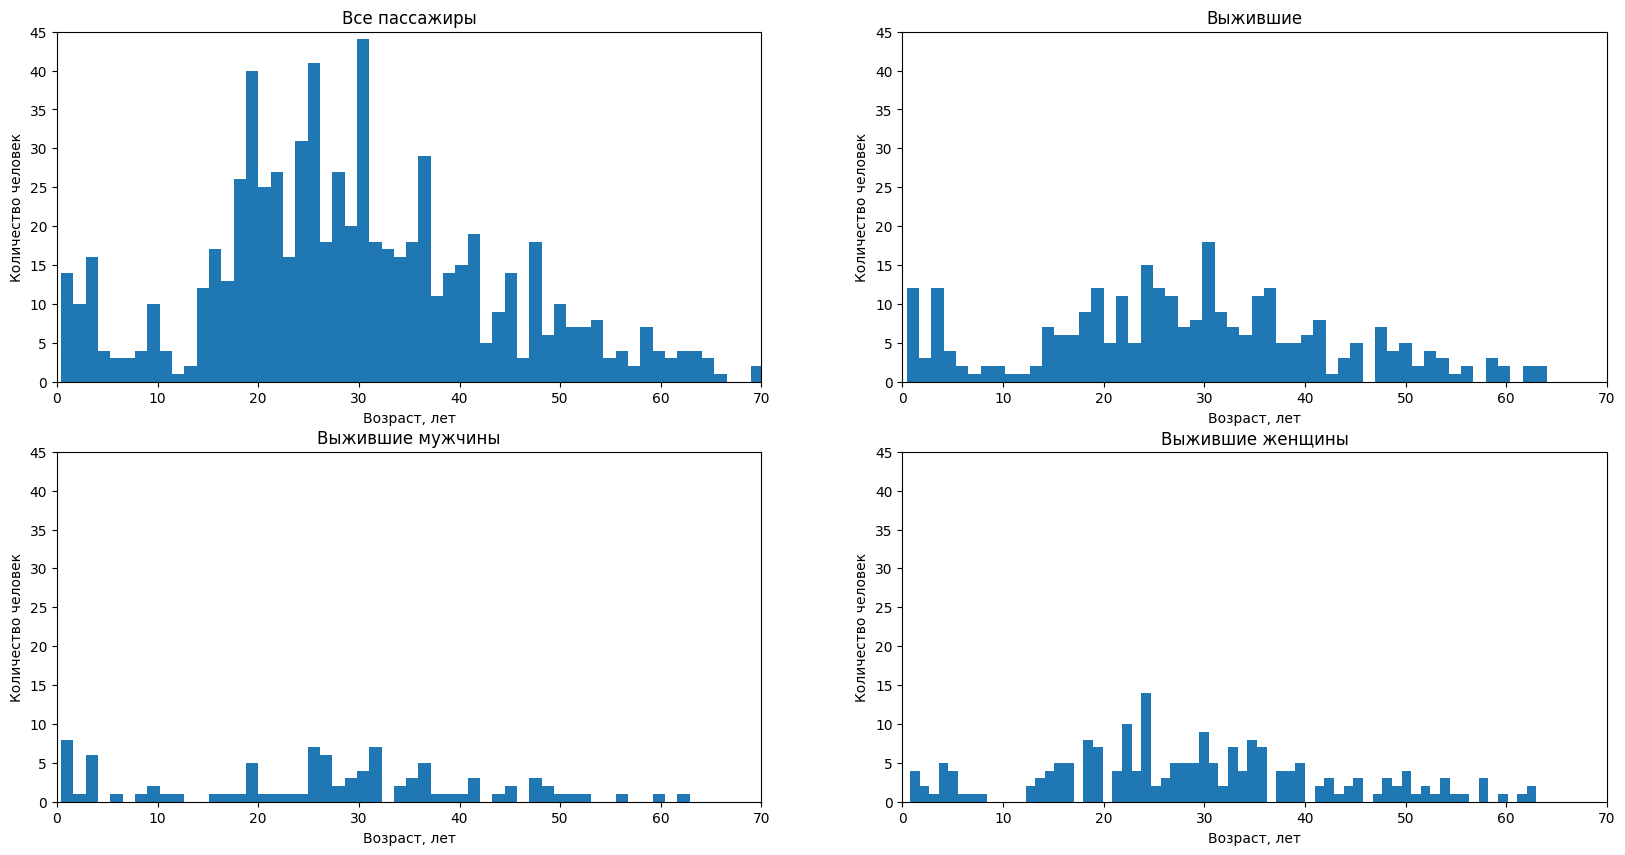

In [11]:
from collections import Counter

#фильтруем от nan значений и разделяем по полу
survivors = df.loc[((df['Survived'] == 1) & (df['Age'] > 0))]
male_survivors = df.loc[((df['Sex'] == male) & (df['Survived'] == 1) & (df['Age'] > 0))]
female_survivors = df.loc[((df['Sex'] == female) & (df['Survived'] == 1) & (df['Age'] > 0))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[df.loc[(df['Age'] > 0)], survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,45)
        axs[i][j].set_xlim(0,70)
plt.show()

<Axes: >

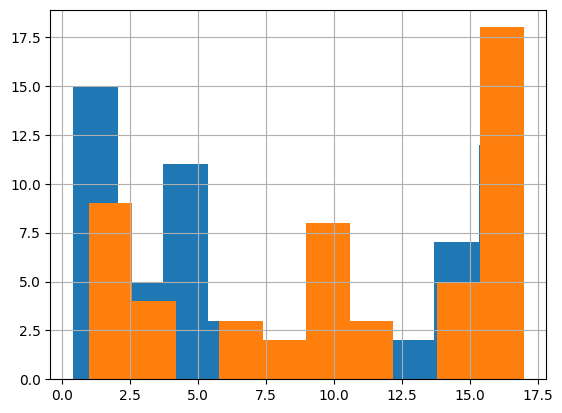

In [12]:
#Выживаемость среди детей
df.loc[((df['Survived'] == 1) & (df['Age'] > 0) & (df['Age'] < 18))].Age.hist()
df.loc[((df['Survived'] == 0) & (df['Age'] > 0) & (df['Age'] < 18))].Age.hist()

Дети от 0 до 5 лет имели большие шансы выжить

# Выживание по портам посадки

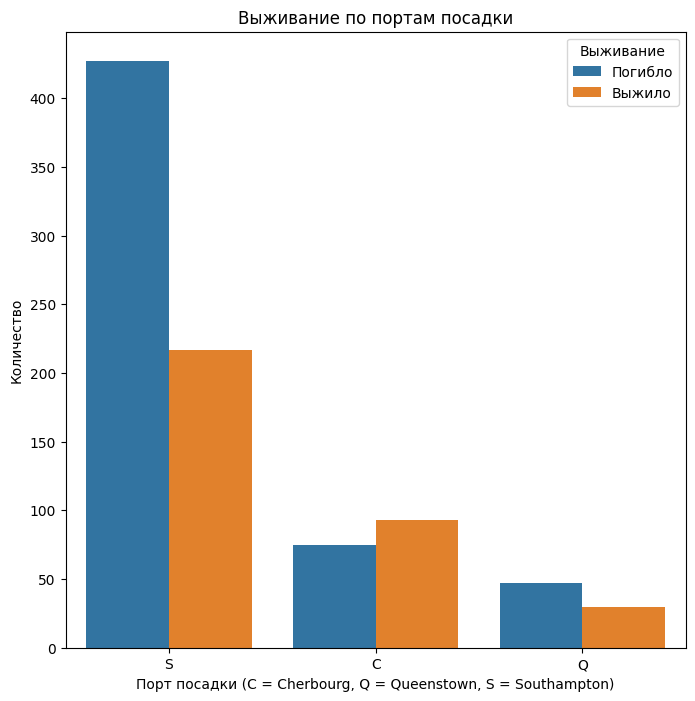

In [13]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Выживание по портам посадки')
plt.xlabel('Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Количество')
plt.legend(title='Выживание', loc='upper right', labels=['Погибло', 'Выжило'])
plt.show()

Больше всего процент смертности у порта S. Скорее всего это связано с другими факторами, не связанными с портом посадки

Процент смертности по портам посадки:
Embarked
C    44.642857
Q    61.038961
S    66.304348
Name: Survived, dtype: float64


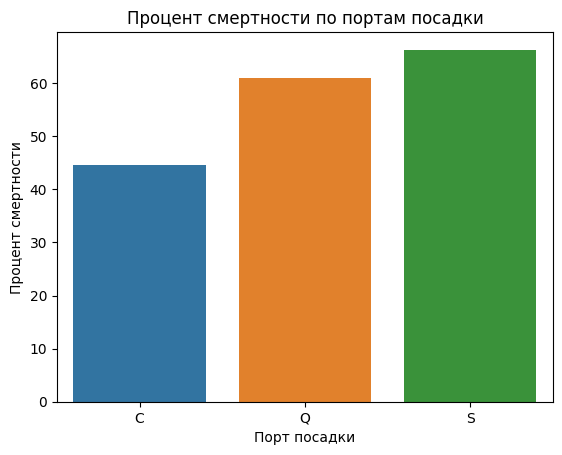

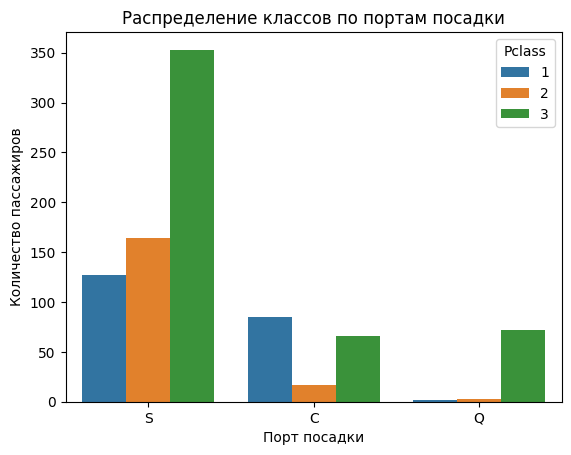

In [14]:
# Группируем по порту посадки и считаем процент погибших
mortality_by_port = df.groupby('Embarked')['Survived'].apply(lambda x: 1 - x.mean()) * 100

# Выведем результаты
print("Процент смертности по портам посадки:")
print(mortality_by_port)

# Построим столбчатую диаграмму для наглядности
sns.barplot(x=mortality_by_port.index, y=mortality_by_port.values)
plt.xlabel("Порт посадки")
plt.ylabel("Процент смертности")
plt.title("Процент смертности по портам посадки")
plt.show()

# Дополнительно проверим, есть ли связь между портом посадки и другими факторами, например, классом пассажиров
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.xlabel("Порт посадки")
plt.ylabel("Количество пассажиров")
plt.title("Распределение классов по портам посадки")
plt.show()

У порта S и Q наибольшую часть людей составляют пассажиры 3-го класса. Также порт S являлся самым популярным, в отличае от порта C и Q. С этим может быть связана выживаемость.

# Выживаемость по количеству родственников

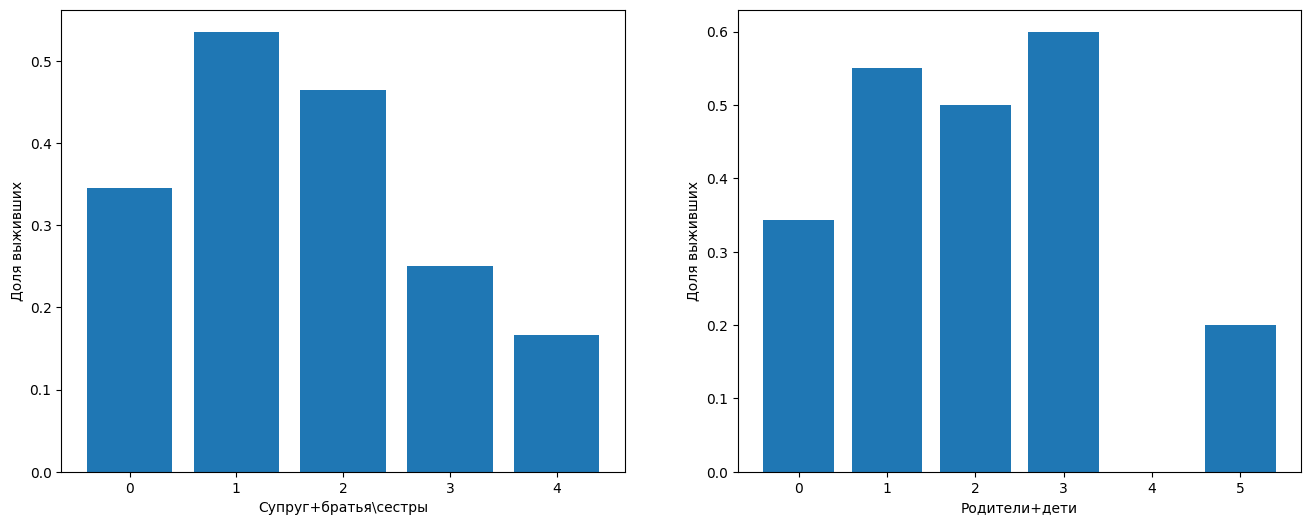

In [15]:
sibsp_total = dict(Counter(df.SibSp))
parch_total = dict(Counter(df.Parch))

sibsp_survived = dict(Counter(df.loc[(df['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(df.loc[(df['Survived'] == 1)].Parch))

relatives = (sibsp_total, parch_total)
relatives_survived = (sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 2, figsize=(16,6))
xlabs = ('Супруг+братья\сестры', 'Родители+дети')

for i in range(2):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()

In [16]:
# Добавим признак Relatives
df.insert(12, 'Relatives', np.array(df.SibSp, int) + np.array(df.Parch, int))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


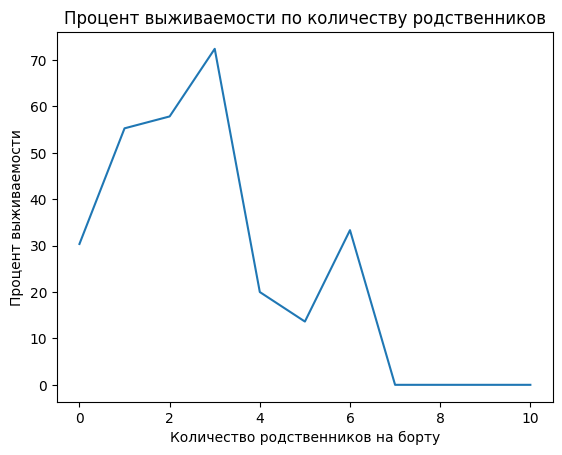

In [17]:
# Дополнительно посмотрим влияние наличия родственников на борту
survived_by_relatives = df.groupby('Relatives')['Survived'].apply(lambda x: x.mean()) * 100
sns.lineplot(x=survived_by_relatives.index, y=survived_by_relatives.values)
plt.xlabel("Количество родственников на борту")
plt.ylabel("Процент выживаемости")
plt.title("Процент выживаемости по количеству родственников")
plt.show()

Наибольший шанс выжить имеют люди с 1-3 родственными связями и люди без родственных связей

In [18]:
# Добавим признак is_alone
is_alone = []
for fam in df.Relatives:
    if fam == 0:
        is_alone.append(1)
    else:
        is_alone.append(0)
df.insert(13, 'is_alone', is_alone)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


<Axes: >

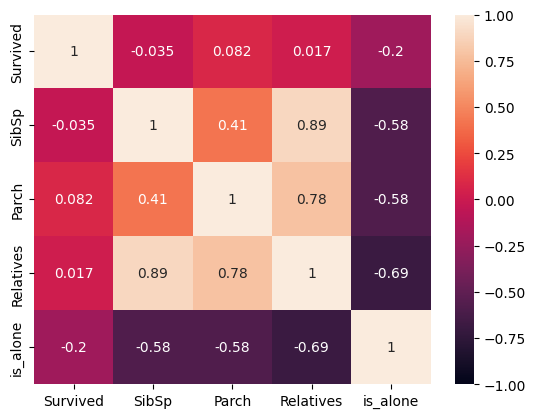

In [19]:
#Тепловая карта семейных призанков
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Relatives', 'is_alone']].corr(), annot=True, vmin=-1, vmax=1)

Как видим признаки Parch и SibSp имеют слабую кореляцию с выживаемостью, поэтому их можно заменить на признаки Realtives и is_alone, которые вместе дают более корелирующую информацию

In [20]:
df = df.drop(columns=['SibSp', 'Parch'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,0,1


# Имя, айди и билет

In [21]:
# Имя, айди и билет не влияют на выживаемость - имя может указывать на возраст, номер билета - на класс и кабинку, которые в свою очередь влияют на выживаемость
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives,is_alone
0,0,3,male,22.0,7.2500,NaN,S,1,0
1,1,1,female,38.0,71.2833,C85,C,1,0
2,1,3,female,26.0,7.9250,NaN,S,0,1
3,1,1,female,35.0,53.1000,C123,S,1,0
4,0,3,male,35.0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,0,1
887,1,1,female,19.0,30.0000,B42,S,0,1
888,0,3,female,NaN,23.4500,NaN,S,3,0
889,1,1,male,26.0,30.0000,C148,C,0,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


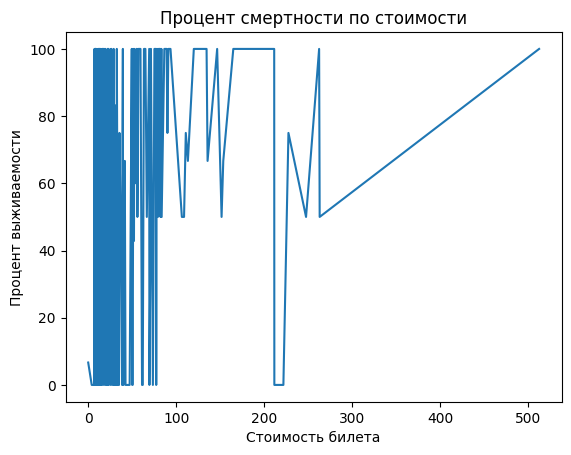

In [22]:
# Дополнительно посмотрим влияние стоимости билета
survived_by_fare = df.groupby('Fare')['Survived'].apply(lambda x: x.mean()) * 100
sns.lineplot(x=survived_by_fare.index, y=survived_by_fare.values)
plt.xlabel("Стоимость билета")
plt.ylabel("Процент выживаемости")
plt.title("Процент смертности по стоимости")
plt.show()

In [23]:
def fare_group(fare):
    if fare < 10:
        return 'A'
    elif 10 <= fare <= 50:
        return 'B'
    elif fare > 50:
        return 'C'
    else:
        return

df['Fare'] = df['Fare'].apply(fare_group)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


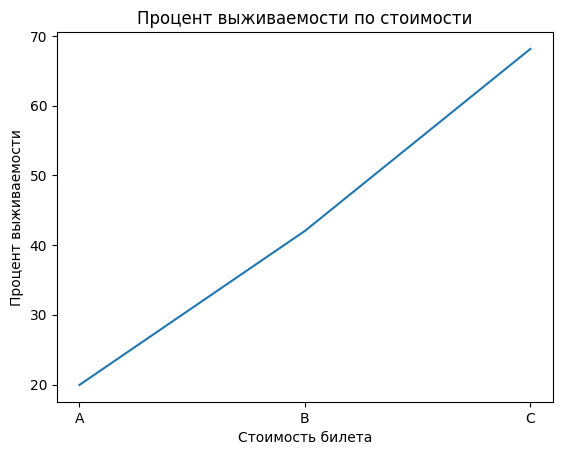

In [24]:
# Дополнительно посмотрим влияние стоимости билета
survived_by_fare = df.groupby('Fare')['Survived'].apply(lambda x: x.mean()) * 100
sns.lineplot(x=survived_by_fare.index, y=survived_by_fare.values)
plt.xlabel("Стоимость билета")
plt.ylabel("Процент выживаемости")
plt.title("Процент выживаемости по стоимости")
plt.show()

Чем дороже билет, тем больше выживаемость

# Выживаемость в зависимости от наличия каюты

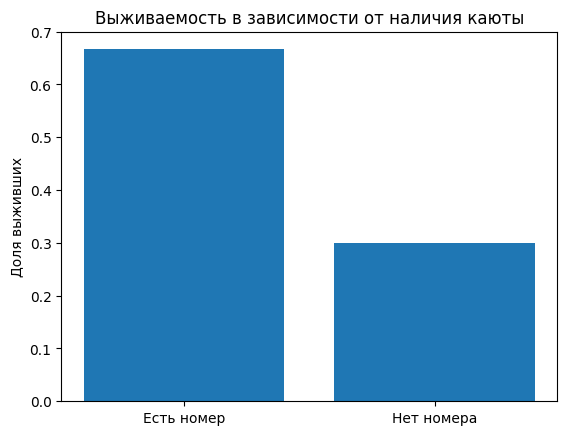

In [25]:
have_cabin = df.loc[(pd.notna(df['Cabin']))]
have_cabin_survived = df.loc[((pd.notna(df['Cabin'])) & (df['Survived'] == 1))]
no_cabin = df.loc[(pd.isna(df['Cabin']))]
no_cabin_survived = df.loc[((pd.isna(df['Cabin'])) & (df['Survived'] == 1))]

fig, ax = plt.subplots()
ax.bar(('Есть номер', 'Нет номера'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от наличия каюты')
plt.show()

каюта влияет на выживаемость

# Преобразование и общая корреляция

In [26]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
categorical_cols



Index(['Sex', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [29]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Cabin        0
Embarked     0
Relatives    0
is_alone     0
dtype: int64

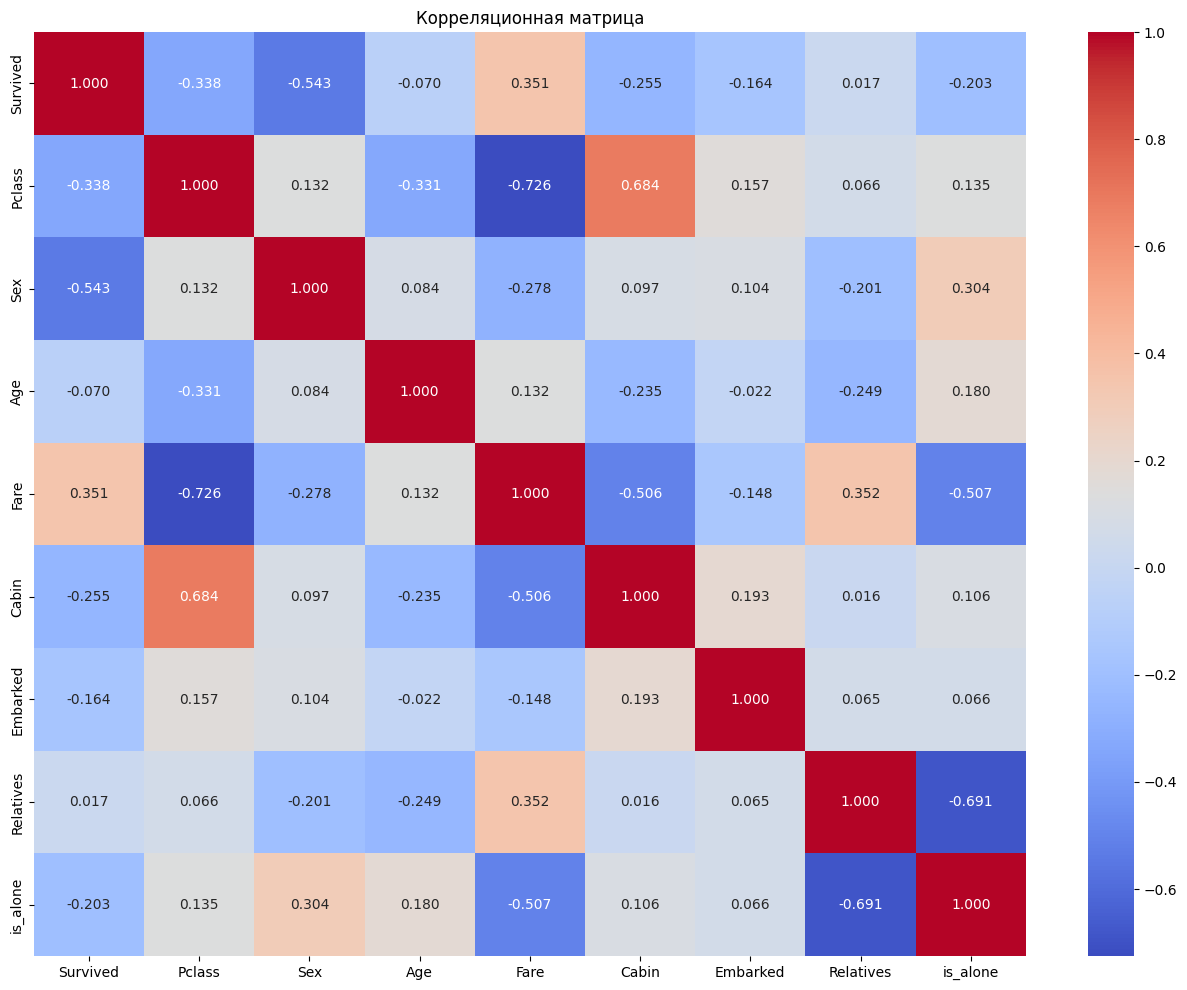

In [30]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [31]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives,is_alone
0,0,3,1,22.000000,0,147,2,1,0
1,1,1,0,38.000000,2,81,0,1,0
2,1,3,0,26.000000,0,147,2,0,1
3,1,1,0,35.000000,2,55,2,1,0
4,0,3,1,35.000000,0,147,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,1,147,2,0,1
887,1,1,0,19.000000,1,30,2,0,1
888,0,3,0,29.699118,1,147,2,3,0
889,1,1,1,26.000000,1,60,0,0,1


# **Modeling**

In [32]:
# Разделяем датасет
X = df.drop(columns=['Survived'])
y = df['Survived']
X, y

(     Pclass  Sex        Age  Fare  Cabin  Embarked  Relatives  is_alone
 0         3    1  22.000000     0    147         2          1         0
 1         1    0  38.000000     2     81         0          1         0
 2         3    0  26.000000     0    147         2          0         1
 3         1    0  35.000000     2     55         2          1         0
 4         3    1  35.000000     0    147         2          0         1
 ..      ...  ...        ...   ...    ...       ...        ...       ...
 886       2    1  27.000000     1    147         2          0         1
 887       1    0  19.000000     1     30         2          0         1
 888       3    0  29.699118     1    147         2          3         0
 889       1    1  26.000000     1     60         0          0         1
 890       3    1  32.000000     0    147         1          0         1
 
 [891 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889   

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

In [34]:
# Нормализуем значения
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
# model  Sequential()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(40, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)
loss, accuracy = model.evaluate(X_test, y_test)

print(f'test loss {loss:.3f}, test accuracy {accuracy:.3f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5400 - loss: 0.9110 - val_accuracy: 0.7701 - val_loss: 0.6113
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5478 - loss: 0.8142 - val_accuracy: 0.7701 - val_loss: 0.5624
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6358 - loss: 0.7124 - val_accuracy: 0.7433 - val_loss: 0.5374
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6472 - loss: 0.6734 - val_accuracy: 0.8182 - val_loss: 0.5151
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6624 - loss: 0.6599 - val_accuracy: 0.8128 - val_loss: 0.5046
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6337 - loss: 0.6483 - val_accuracy: 0.8128 - val_loss: 0.4921
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7168 - loss: 0.5887 - val_accuracy: 0.8128 - val_loss: 0.4821
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7126 - loss: 0.5779 - val_accuracy: 0.8128 - 

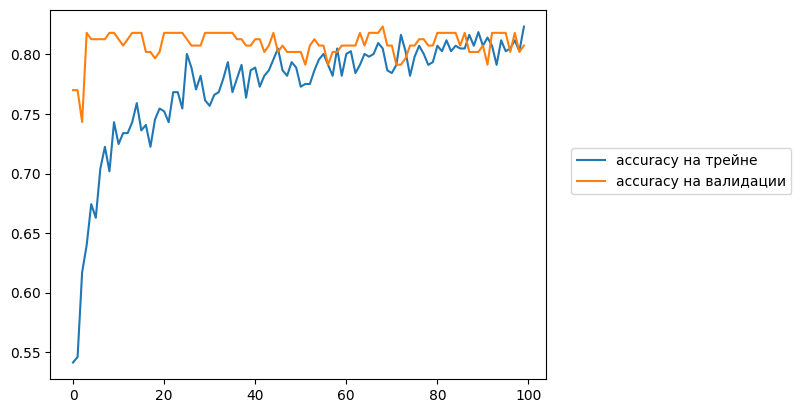

In [36]:
plt.plot(train_history.history['accuracy'], label='accuracy на трейне') 
plt.plot(train_history.history['val_accuracy'], label='accuracy на валидации')
plt.legend(loc=(1.05, 0.5))

In [37]:
from sklearn.model_selection import StratifiedKFold

# Создаем фолды для кросс-валидации
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [38]:
# Модель SGD 
from sklearn.linear_model import SGDClassifier

alg_sgd = SGDClassifier(random_state=1)
scores = cross_val_score(alg_sgd, X, y, cv=cv, n_jobs=-1)
print("Accuracy (sgd): {}/{}".format(scores.mean(), scores.std()))

Accuracy (sgd): 0.7811447811447811/0.007273558584071639


In [39]:
# одель RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

alg_frst = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
scores = cross_val_score(alg_frst, X, y, cv=cv, n_jobs=-1)
print("Accuracy (random forest): {}/{}".format(scores.mean(), scores.std()))

Accuracy (random forest): 0.8215488215488215/0.014547117168143331


In [40]:
# Модель XGBOOST
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

ald_xgb_model = xgb.XGBClassifier()
ald_xgb_params = [
    {"n_estimators": [100, 150, 200, 250, 300],
     "max_depth": [1, 2, 4],
     "learning_rate": [0.01, 0.02, 0.05, 0.1]}
]
alg_xgb_grid = GridSearchCV(ald_xgb_model, ald_xgb_params, cv=cv, refit=True, verbose=1, n_jobs=1)
alg_xgb_grid.fit(X, y)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy (xgboost auto): 0.8361391694725029 with params {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


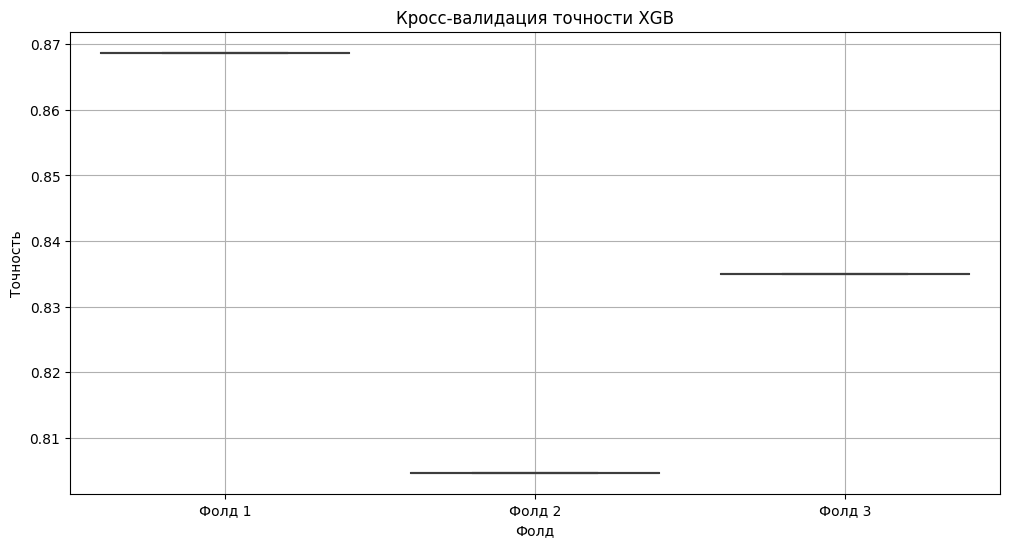

In [41]:
# Точность каждого фолда
accuracies = cross_val_score(alg_xgb_best, X, y, cv=cv)

plt.figure(figsize=(12, 6))
sns.boxplot(x=np.arange(1, cv.get_n_splits() + 1), y=accuracies)
plt.title(f'Кросс-валидация точности XGB')
plt.xlabel('Фолд')
plt.ylabel('Точность')
plt.xticks(np.arange(0, cv.get_n_splits(), 1), [f'Фолд {i+1}' for i in range(cv.get_n_splits())])
plt.grid(True)
plt.show()

# Вывод

Модель XGBOOST показала наилучший результат с точностью в 83.6% 

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

predict_y = cross_val_predict(alg_xgb_best, X, y, cv=cv)
confus_matrix = confusion_matrix(y, predict_y)
tn, fp, fn, tp = confus_matrix.ravel()


print(f'Confusion Matrix for RandomForest: \n{confus_matrix}')
print(f'Model RandomForest: \n'
      f'Предсказала, что погибнет, а по факту не погиб = {fp}\n'
      f'Предсказала, что не погибнет, а по факту погиб = {fn}\n'
      f'Предсказала, что не погибнет, и по факту не погиб = {tn}\n'
      f'Предсказала, что погибнет, и по факту погиб = {tp}\n')


class_report = classification_report(y, predict_y)
print(f'Classification Report for RandomFores:\n{class_report}')

Confusion Matrix for RandomForest: 
[[505  44]
 [102 240]]
Model RandomForest: 
Предсказала, что погибнет, а по факту не погиб = 44
Предсказала, что не погибнет, а по факту погиб = 102
Предсказала, что не погибнет, и по факту не погиб = 505
Предсказала, что погибнет, и по факту погиб = 240

Classification Report for RandomFores:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       549
           1       0.85      0.70      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.81      0.82       891
weighted avg       0.84      0.84      0.83       891

